In [1]:
import numpy as np
import pandas as pd

In [2]:
# Please, to run the experiments donwload the following dataset and put them in the /Dataset folder:
# 	- 3D_spatial_network.txt - 
#       https://archive.ics.uci.edu/ml/machine-learning-databases/00246/3D_spatial_network.txt

filename = "Datasets/3D_spatial_network.txt"
df = pd.read_csv(filename, sep=',', usecols=[1,2,3])
df = df.dropna()

df.columns = ['Longitude', 'Latitude', 'Altitude']
print(list(df.columns.values) )

df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Altitude'] = pd.to_numeric(df['Altitude'], errors='coerce')

df = df.dropna()

print(df.shape)
print(df.dtypes)

['Longitude', 'Latitude', 'Altitude']
(434873, 3)
Longitude    float64
Latitude     float64
Altitude     float64
dtype: object


In [3]:
x = df[['Longitude','Latitude']]
x = x.to_numpy()
y = df['Altitude']
y = y.to_numpy()

In [4]:
import CaGD_ls

x = np.ascontiguousarray(x)
print(x.shape)
x = CaGD_ls.tens_pow(x,5) 
print(x.shape)

(434873, 2)
(434873, 62)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.999, svd_solver='full')
pca.fit(x_scaled)

x_scaled_pca = pca.transform(x_scaled)

print(np.shape(x_scaled_pca))
pca.explained_variance_ratio_.sum()

(434873, 7)


0.9999999999999957

In [7]:
x_scaled_pca = CaGD_ls.add_bias(x_scaled_pca)
print(np.shape(x_scaled_pca))

(434873, 8)


18.617987672939996

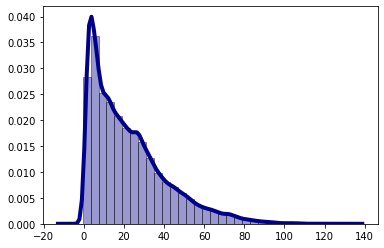

In [8]:
import seaborn as sns

sns.distplot(y, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
y.std()

In [9]:
lr = 1e-3 
block_dim = 2
loss_accepted = 1e-5
max_iter = 5e1
lambda_LASSO = 1e-2
batch_size = 256

n = np.shape(x_scaled_pca)[1]
print("number of parameters ", n)
print("number of points ", x_scaled_pca.shape[0])
theta_0 = np.random.uniform(-1/n**0.5,1/n**0.5,n)

number of parameters  8
number of points  434873


In [10]:
loss_momCA_GS,iteration_momCA_GS,theta_momCA_GS,t_momCA_GS = CaGD_ls.mom_CA_BCD_GS_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  831.0412130305117  | time =  0.014220099999874947
iteration =  2  | loss =  829.0137166026348  | time =  0.20760249999989355
iteration =  4  | loss =  351.7665544629618  | time =  1.9076602000000094
iteration =  6  | loss =  347.50438871614665  | time =  5.173120799999879
iteration =  8  | loss =  341.9007921874553  | time =  8.365551399999958
iteration =  10  | loss =  339.4877243569358  | time =  11.50105769999982
iteration =  12  | loss =  339.16698641999585  | time =  13.570848899999874
iteration =  14  | loss =  338.3251023222777  | time =  16.699168999999983
iteration =  16  | loss =  337.9775191744222  | time =  20.101335999999947
iteration =  18  | loss =  337.9277793026237  | time =  24.68646949999993
iteration =  20  | loss =  337.860555328009  | time =  27.96210659999997
iteration =  22  | loss =  337.79022455548267  | time =  31.339286799999854
iteration =  24  | loss =  337.7778344772757  | time =  34.651566799999955
iteration =  26  | loss =  337

In [11]:
loss_momCA_random,iteration_momCA_random,theta_momCA_random,t_momCA_random = CaGD_ls.mom_CA_BCD_random_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.5)

iteration =  0  | loss =  831.0412130305117  | time =  0.011792600000035236
iteration =  2  | loss =  831.0174359770489  | time =  0.17158689999996568
iteration =  4  | loss =  825.6883466087737  | time =  3.5177627000000484
iteration =  6  | loss =  822.2063948013301  | time =  7.507489599999872
iteration =  8  | loss =  821.949033690825  | time =  10.90312700000004
iteration =  10  | loss =  821.767142370711  | time =  14.237131699999964
iteration =  12  | loss =  819.8627831859299  | time =  17.58715110000003
iteration =  14  | loss =  342.92336897031686  | time =  20.82801840000002
iteration =  16  | loss =  342.61386208065727  | time =  24.138713199999984
iteration =  18  | loss =  341.26967825311  | time =  27.388704799999914
iteration =  20  | loss =  341.0035642579727  | time =  30.98782159999996
iteration =  22  | loss =  338.89610441804956  | time =  35.43965920000005
iteration =  24  | loss =  337.94741829739763  | time =  38.86847420000004
iteration =  26  | loss =  337.832

In [12]:
loss_CABCD_stand_GS,iteration_CABCD_stand_GS,theta_CABCD_stand_GS,t_CABCD_stand_GS = CaGD_ls.CA_BCD_GS_ls(
                             x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  831.0412130305117  | time =  0.013760000000047512
iteration =  2  | loss =  829.0137166026348  | time =  0.24129110000012588
iteration =  4  | loss =  668.6698687649939  | time =  2.340229700000009
iteration =  6  | loss =  560.47651296378  | time =  4.448718999999983
iteration =  8  | loss =  489.0040990861953  | time =  6.632277899999963
iteration =  10  | loss =  440.8100903450888  | time =  8.702685400000064
iteration =  12  | loss =  407.6927836340912  | time =  10.746024900000066
iteration =  14  | loss =  385.19703566913483  | time =  14.101309300000139
iteration =  16  | loss =  370.3775648679782  | time =  16.264339199999995
iteration =  18  | loss =  360.09807089819566  | time =  19.61113189999992
iteration =  20  | loss =  353.08438009542215  | time =  21.70247549999999
iteration =  22  | loss =  348.3876844895116  | time =  25.047338800000034
iteration =  24  | loss =  345.2671302926469  | time =  27.17193680000014
iteration =  26  | loss =  343.02

In [13]:
loss_ADAM,iteration_ADAM,theta_ADAM,t_ADAM = CaGD_ls.ADAM_ls(x_scaled_pca,y,theta_0,lambda_LASSO,batch_size,lr,loss_accepted,max_iter)

iteration =  0  | loss =  831.0412130305117  | time =  0.010841800000207513
iteration =  1  | loss =  760.4357933159329  | time =  0.329258000000209
iteration =  2  | loss =  698.477423760696  | time =  0.6599418000000696
iteration =  3  | loss =  642.9400250699899  | time =  0.9975393000001986
iteration =  4  | loss =  593.3527015096287  | time =  1.2473151000001508
iteration =  5  | loss =  549.3647826382588  | time =  1.6290548000001763
iteration =  6  | loss =  511.17340933883247  | time =  1.9077027000000726
iteration =  7  | loss =  478.887230606761  | time =  2.136735700000145
iteration =  8  | loss =  453.1515605342668  | time =  2.368114500000047
iteration =  9  | loss =  434.74556165583095  | time =  2.5950476000000435
iteration =  10  | loss =  424.3018835694355  | time =  2.839619300000095
iteration =  11  | loss =  420.30947503922357  | time =  3.0956047000001945
iteration =  12  | loss =  419.3955374967504  | time =  3.3767582000000402
iteration =  13  | loss =  418.91013

In [14]:
lr = 1e-6
loss_SAG,iteration_SAG,theta_SAG,t_SAG = CaGD_ls.SAG_ls(x_scaled_pca,y,theta_0,lambda_LASSO,batch_size,lr,loss_accepted,max_iter)

iteration =  0  | loss =  831.0412130305117  | time =  0.010485199999948236
iteration =  1  | loss =  827.6273857521552  | time =  0.3450720000000729
iteration =  2  | loss =  824.227091269043  | time =  0.7145307000000685
iteration =  3  | loss =  820.8828380770694  | time =  1.0734354999999596
iteration =  4  | loss =  817.5733518859283  | time =  1.4872087999999621
iteration =  5  | loss =  814.2998105636088  | time =  1.8588842999999997
iteration =  6  | loss =  811.0566794948415  | time =  2.232501700000057
iteration =  7  | loss =  807.8414432704233  | time =  2.608844999999974
iteration =  8  | loss =  804.652835440439  | time =  2.9897673000000395
iteration =  9  | loss =  801.4889789298966  | time =  3.3658961000001
iteration =  10  | loss =  798.3497190719332  | time =  3.747039099999938
iteration =  11  | loss =  795.2339134910525  | time =  4.1131339000000935
iteration =  12  | loss =  792.14091847031  | time =  4.497974500000055
iteration =  13  | loss =  789.0702733746766

In [15]:
print("loss min mom GS CA = ", min(loss_momCA_GS))
print("loss min mom random CA = ", min(loss_momCA_random))
print("loss min standard GS CA = ", min(loss_CABCD_stand_GS))
print("loss min ADAM = ", min(loss_ADAM))
print("loss min SAG = ", min(loss_SAG))

loss min mom GS CA =  337.73313685693284
loss min mom random CA =  337.73254160499715
loss min standard GS CA =  337.8703558464659
loss min ADAM =  418.6780715971723
loss min SAG =  686.8757206708233


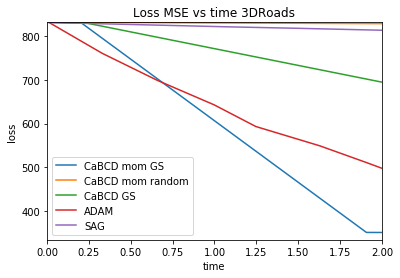

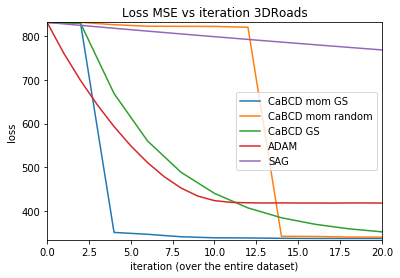

In [16]:
from matplotlib import pyplot as plt

plt.plot(t_momCA_GS, loss_momCA_GS, label="CaBCD mom GS")
plt.plot(t_momCA_random, loss_momCA_random, label="CaBCD mom random")
plt.plot(t_CABCD_stand_GS, loss_CABCD_stand_GS, label="CaBCD GS")
plt.plot(t_ADAM, loss_ADAM, label="ADAM")
plt.plot(t_SAG, loss_SAG, label="SAG")
plt.legend()
plt.title('Loss MSE vs time 3DRoads')
plt.xlabel('time')
plt.ylabel('loss')

plt.xlim([0,2])
plt.ylim([min(loss_ADAM)*0.8,max(loss_ADAM)])
# plt.savefig('CaBCD_vs_all_time_3DRoads.pdf', bbox_inches='tight')
plt.show()

plt.plot(iteration_momCA_GS, loss_momCA_GS, label="CaBCD mom GS")
plt.plot(iteration_momCA_random, loss_momCA_random, label="CaBCD mom random")
plt.plot(iteration_CABCD_stand_GS, loss_CABCD_stand_GS, label="CaBCD GS")
plt.plot(iteration_ADAM, loss_ADAM, label="ADAM")
plt.plot(iteration_SAG, loss_SAG, label="SAG")
plt.legend()
plt.title('Loss MSE vs iteration 3DRoads')
plt.xlabel('iteration (over the entire dataset)')
plt.ylabel('loss')
plt.xlim([0,20])
plt.ylim([min(loss_ADAM)*0.8,max(loss_ADAM)])
# plt.savefig('CaBCD_vs_all_iteration_3DRoads.pdf', bbox_inches='tight')
plt.show()